In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
credit_card_data = pd.read_csv("data_file")
credit_card_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
credit_card_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Who made one off purchases of $40761, the maximum of oneoff purchases
credit_card_data[credit_card_data["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
credit_card_data["CASH_ADVANCE"].max()

47137.21176

In [7]:
# Find who make the cash advance of $47137
# This customer make 123 cash advance transactions (as seen in cash advance trx)
# They never paid the credit card in full (prc full payment)

credit_card_data[credit_card_data["CASH_ADVANCE"] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualize the Data

<AxesSubplot:>

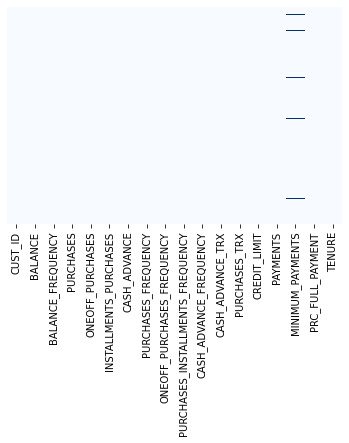

In [8]:
# Find Missing Data
sb.heatmap(credit_card_data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [9]:
credit_card_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# impute the null(missing) values with the average of the minimum payment
credit_card_data.loc[(credit_card_data["MINIMUM_PAYMENTS"].isnull() == True), "MINIMUM_PAYMENTS"] = credit_card_data["MINIMUM_PAYMENTS"].mean()


In [11]:
# Impute the missing elements with the average of credit limit
credit_card_data.loc[(credit_card_data["CREDIT_LIMIT"].isnull() == True), "CREDIT_LIMIT"] = credit_card_data["CREDIT_LIMIT"].mean()


<AxesSubplot:>

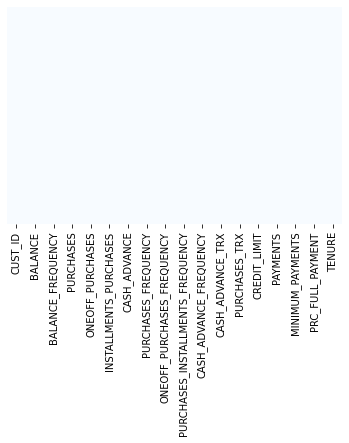

In [12]:
sb.heatmap(credit_card_data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [13]:
# Find duplicate entries

credit_card_data.duplicated().sum()

0

In [14]:
credit_card_data.drop("CUST_ID", axis = 1, inplace = True)

In [15]:
credit_card_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
n = len(credit_card_data.columns)
n

17

In [17]:
credit_card_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

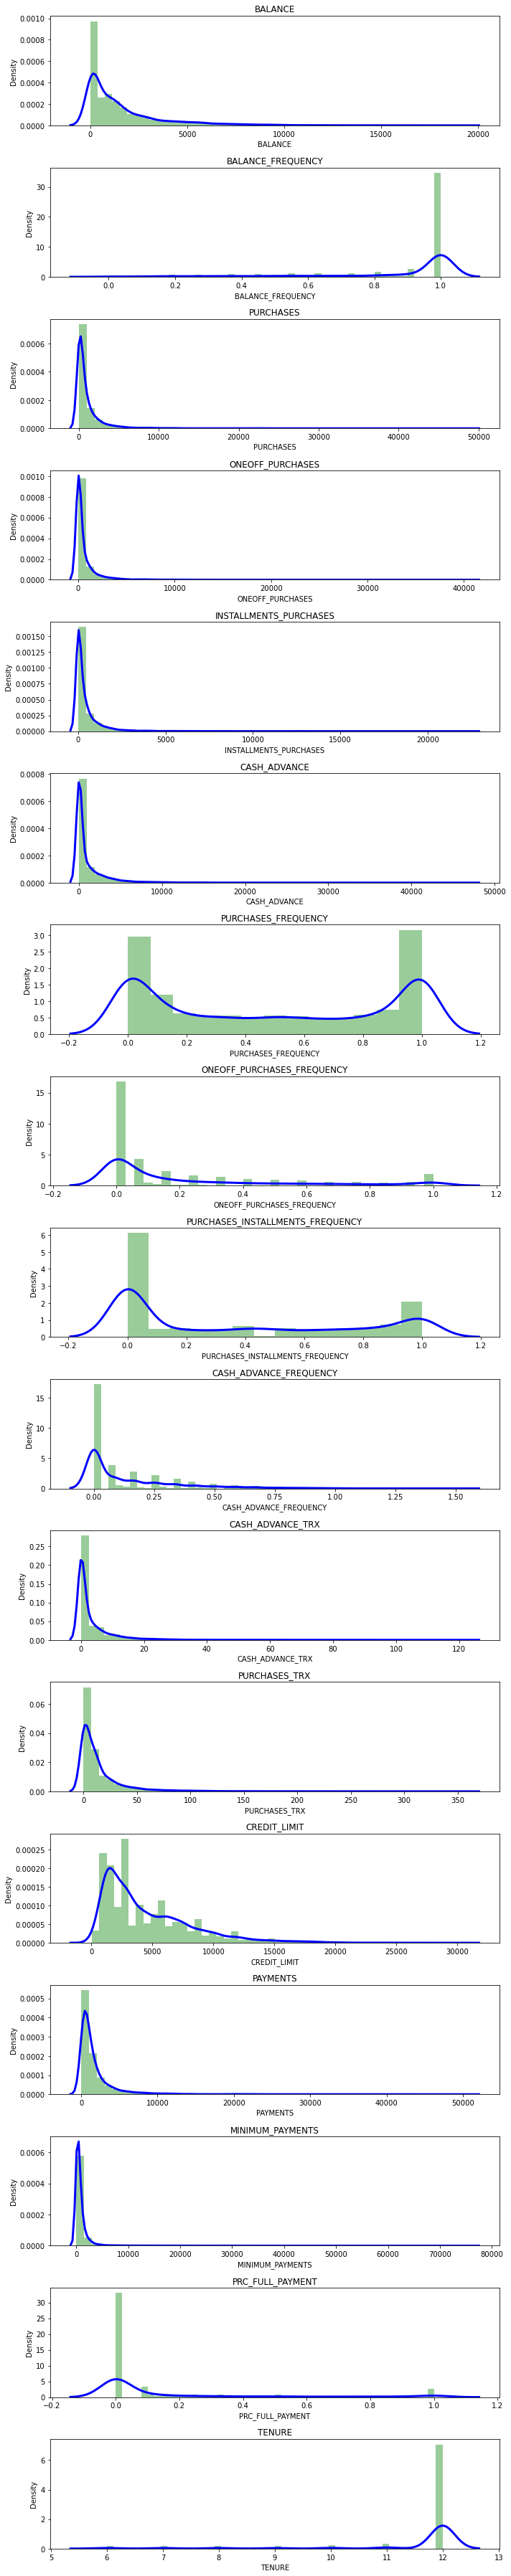

In [18]:
plt.figure(figsize=(10,50))
for i in range(len(credit_card_data.columns)):
    plt.subplot(17, 1, i+1)
    sb.distplot(credit_card_data[credit_card_data.columns[i]], kde_kws={"color": "b", "lw":3, "label":"KDE"}, hist_kws={"color":"g"})
    plt.title(credit_card_data.columns[i])
                                 
plt.tight_layout()


<AxesSubplot:>

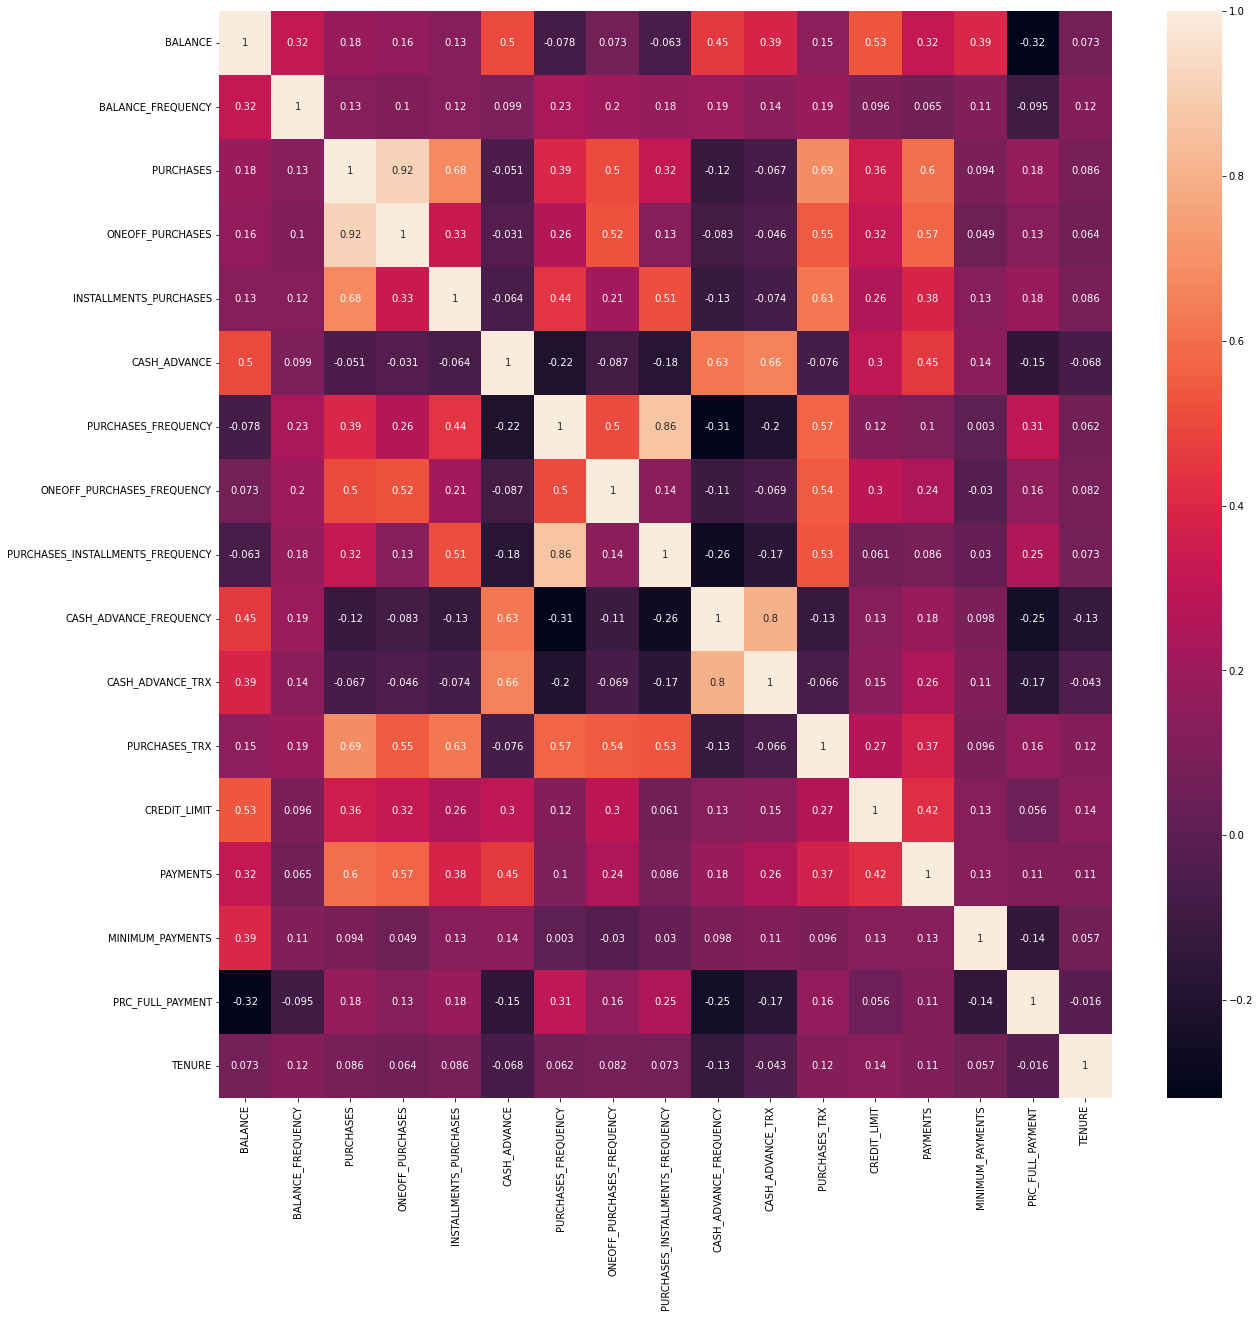

In [19]:
correlations = credit_card_data.corr()
f, ax = plt.subplots(figsize = (20,20))
sb.heatmap(correlations, annot = True)

## Finding the Optimal Number of Clusters with the Elbow Method

In [20]:
scaler = StandardScaler()
credit_card_data_scaled = scaler.fit_transform(credit_card_data)

In [21]:
credit_card_data_scaled.shape

(8950, 17)

In [22]:
credit_card_data_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

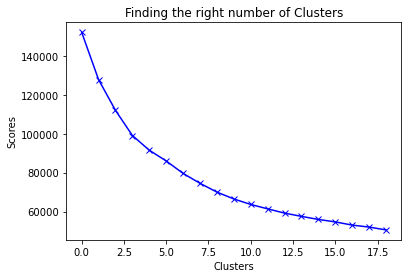

In [23]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(credit_card_data_scaled)
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, "bx-")
plt.title("Finding the right number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("Scores")
plt.show()

# The 4th/5th point starts to form the elbow
# the values don't reduce linearly until the 8th point

## Applying K-Means

In [24]:
kmeans = KMeans(8)
kmeans.fit(credit_card_data_scaled)
labels = kmeans.labels_

In [25]:
kmeans.cluster_centers_.shape

(8, 17)

In [26]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [credit_card_data.columns])
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.637351,0.391680,-0.215264,-0.150014,-0.233452,1.998071,-0.454915,-0.172928,-0.413994,1.927157,1.926261,-0.256354,1.008117,0.815826,0.366770,-0.389025,0.074574
1,-0.342095,0.352458,0.028181,-0.093472,0.238186,-0.368826,0.977415,0.189999,0.899547,-0.470767,-0.359800,0.226559,-0.149174,-0.182834,-0.128062,0.332596,0.270999
2,0.012121,0.403012,-0.346854,-0.226840,-0.403270,-0.101471,-0.835615,-0.363219,-0.763119,0.091133,-0.038107,-0.472865,-0.299553,-0.248447,-0.059695,-0.455377,0.271638
3,-0.701409,-2.139136,-0.305951,-0.230225,-0.300341,-0.323432,-0.539016,-0.437305,-0.428457,-0.522496,-0.377192,-0.414987,-0.174212,-0.199323,-0.257473,0.288454,0.200959
4,0.484161,0.455495,1.764723,1.533011,1.356206,-0.244419,1.153106,1.817359,0.946525,-0.356101,-0.266963,2.064136,1.110125,0.954805,0.082002,0.491307,0.311275
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
6,-0.341141,-0.333100,-0.280989,-0.207459,-0.282905,0.060232,-0.171997,-0.271368,-0.207953,0.291927,-0.007982,-0.379541,-0.560480,-0.389957,-0.207857,0.021533,-3.178761
7,1.198066,0.470114,0.011315,-0.285606,0.550623,-0.026758,-0.047416,-0.547152,0.193031,-0.147366,-0.033845,0.157512,-0.062278,-0.037378,9.395504,-0.520463,0.293962


In [27]:
# What do these numbers mean?
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [credit_card_data.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4972.482153,0.970056,543.289245,343.444234,199.959505,5168.919106,0.307771,0.150870,0.199905,0.520788,16.394144,8.337838,8162.392506,4094.880925,1718.948254,0.039932,11.617117
1,852.433376,0.960765,1063.413333,437.292893,626.456512,205.425130,0.882634,0.259138,0.721940,0.040939,0.793454,20.341234,3951.692052,1203.858702,565.764545,0.250993,11.879985
2,1589.702954,0.972740,262.146277,215.929526,46.395991,766.081055,0.154978,0.094102,0.061154,0.153381,2.988772,2.956175,3404.551491,1013.914049,725.090394,0.020525,11.880840
3,104.552193,0.370529,349.536044,210.311551,139.473277,300.618996,0.274017,0.072001,0.194158,0.030587,0.674769,4.394803,3860.594673,1156.124299,264.177381,0.238083,11.786253
4,2572.214596,0.985173,4773.563567,3136.922025,1637.467989,466.312042,0.953148,0.744611,0.740611,0.063885,1.426997,66.016529,8533.539945,4497.211364,1055.307837,0.297413,11.933884
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,854.418008,0.798362,402.868166,248.098605,155.239781,1105.181375,0.421320,0.121503,0.281791,0.193562,3.194357,5.275862,2455.195062,604.255929,379.804248,0.160013,7.263323
7,4058.147688,0.988636,1027.378750,118.389464,908.989286,922.757849,0.471320,0.039232,0.441153,0.105655,3.017857,18.625000,4267.857143,1624.939145,22760.031552,0.001488,11.910714


In [28]:
labels.shape

(8950,)

In [29]:
labels.max()

7

In [30]:
y_kmeans = kmeans.fit_predict(credit_card_data_scaled)
y_kmeans

array([7, 3, 5, ..., 2, 2, 2])

In [31]:
# concatenate the clusters to the original data frame
credit_card_data_cluster = pd.concat([credit_card_data, pd.DataFrame({"cluster":labels})], axis = 1)
credit_card_data_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


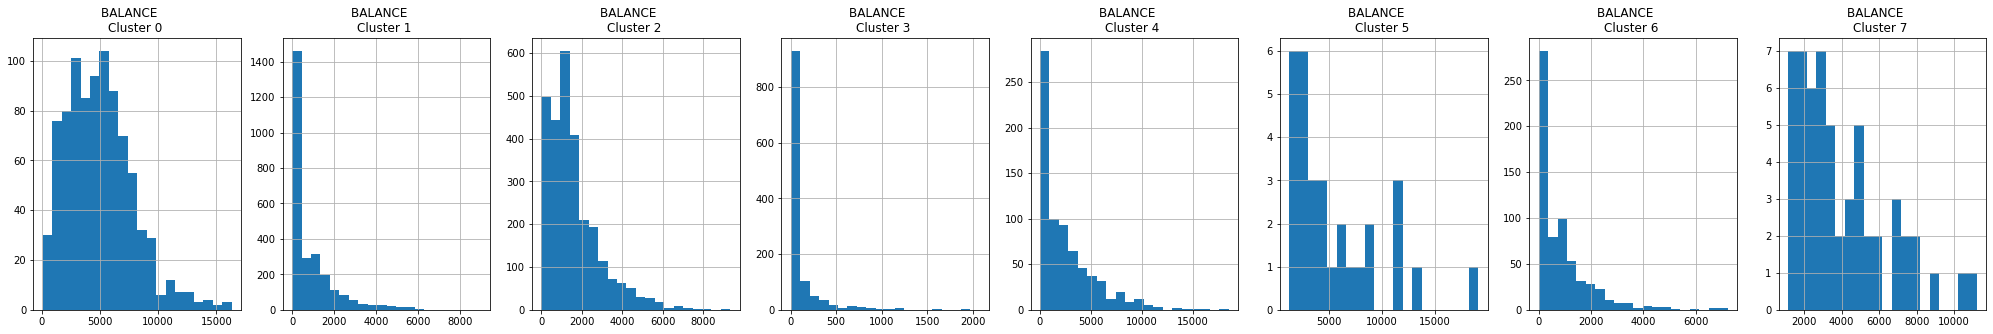

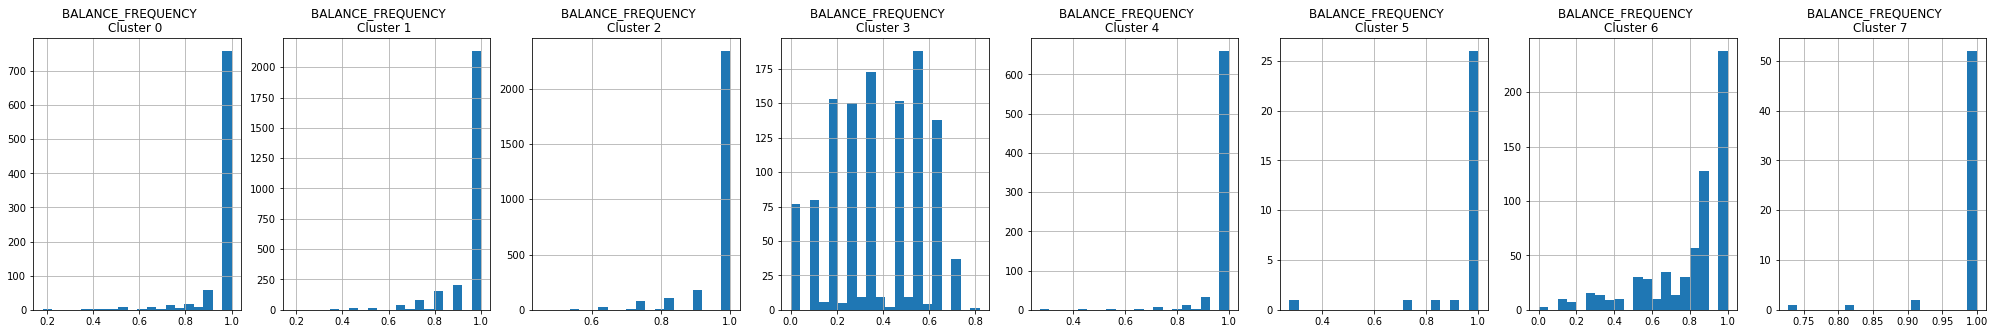

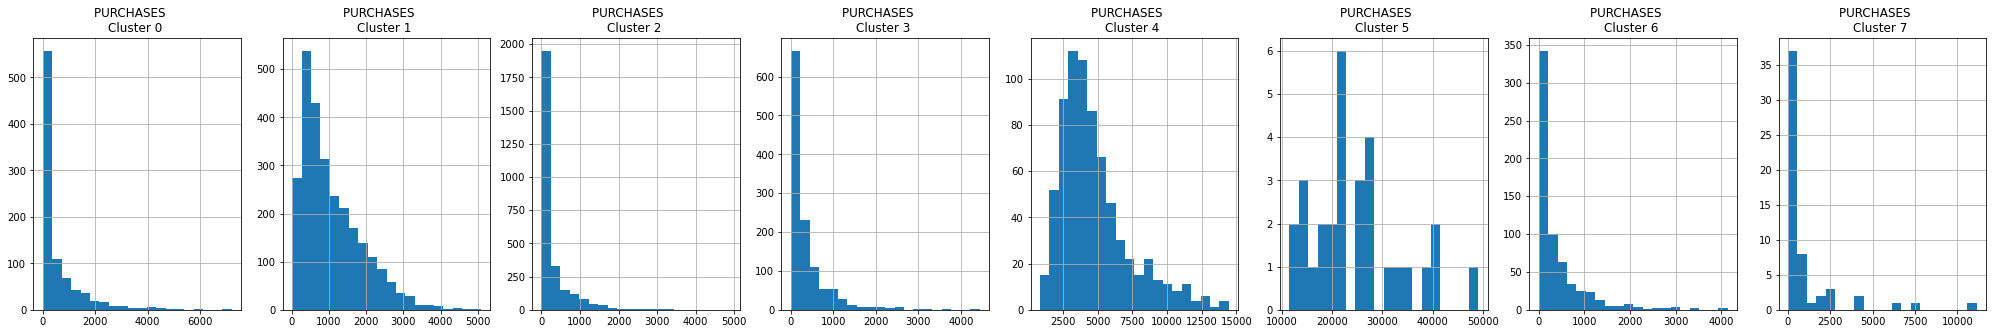

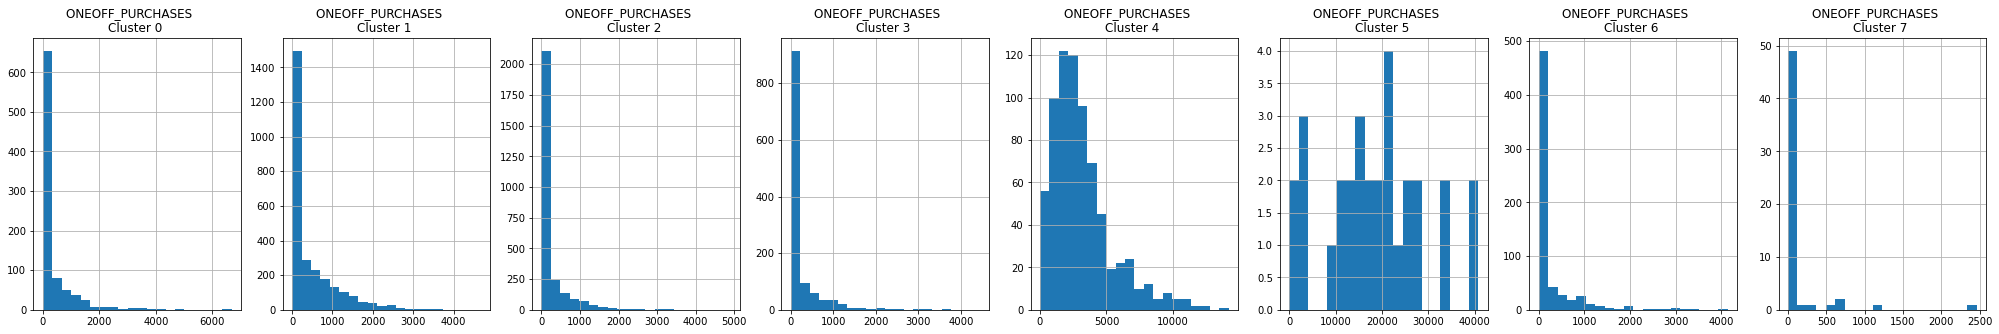

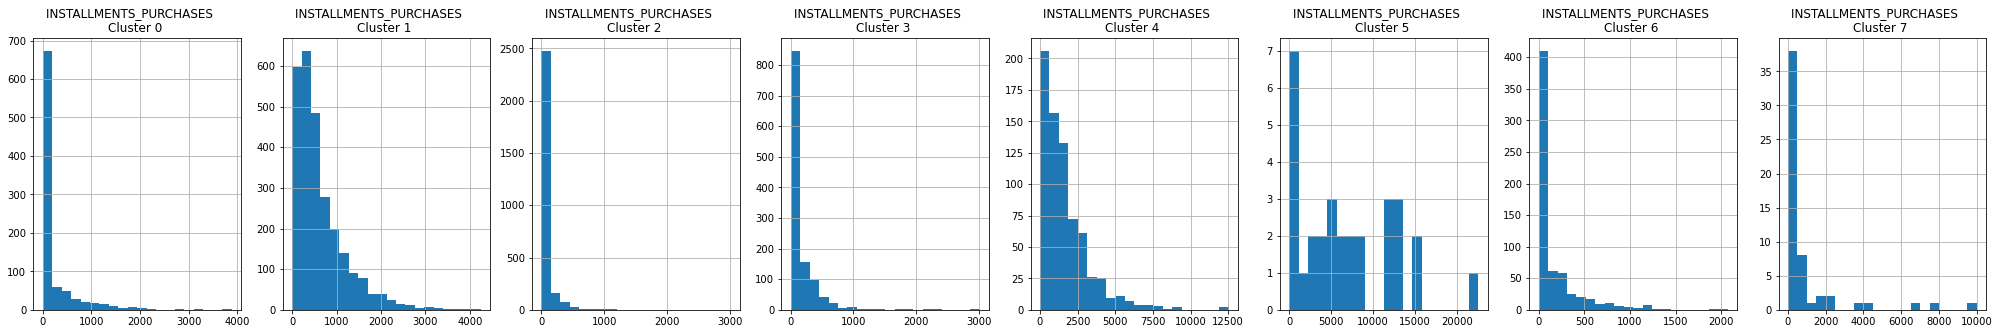

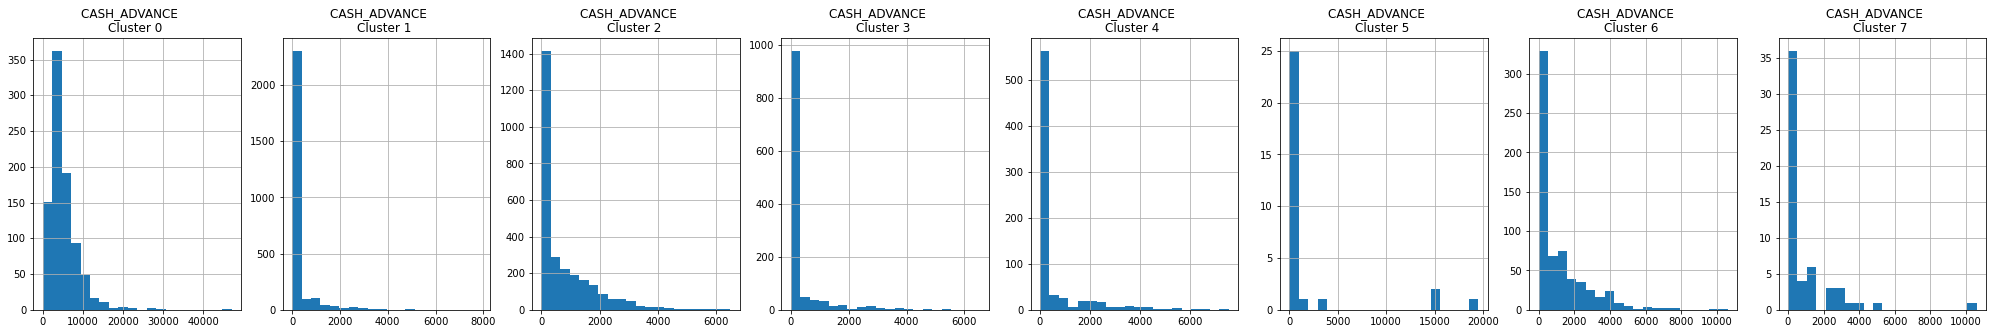

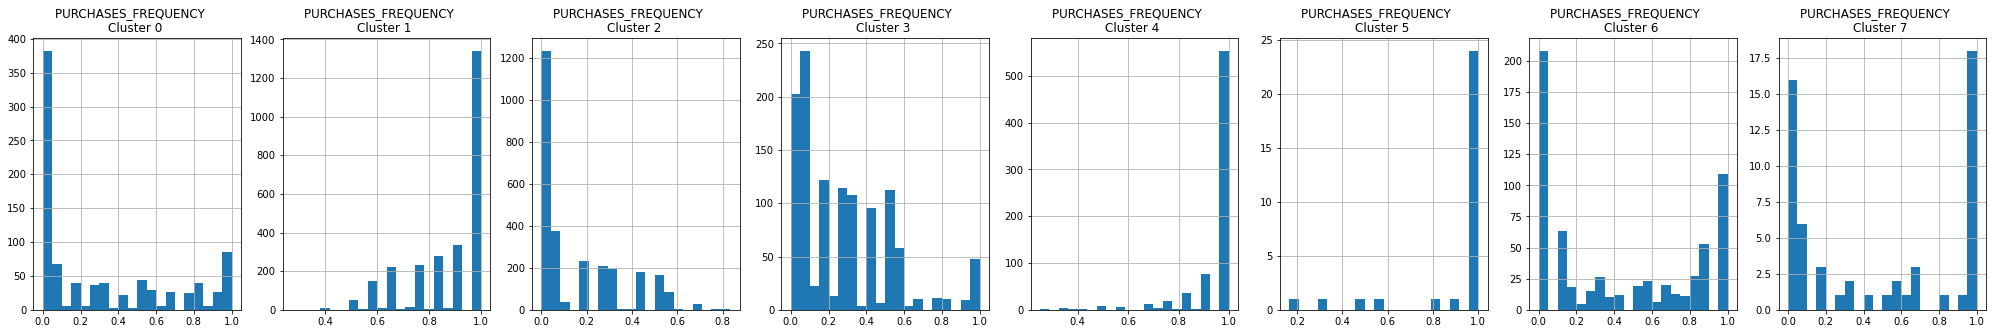

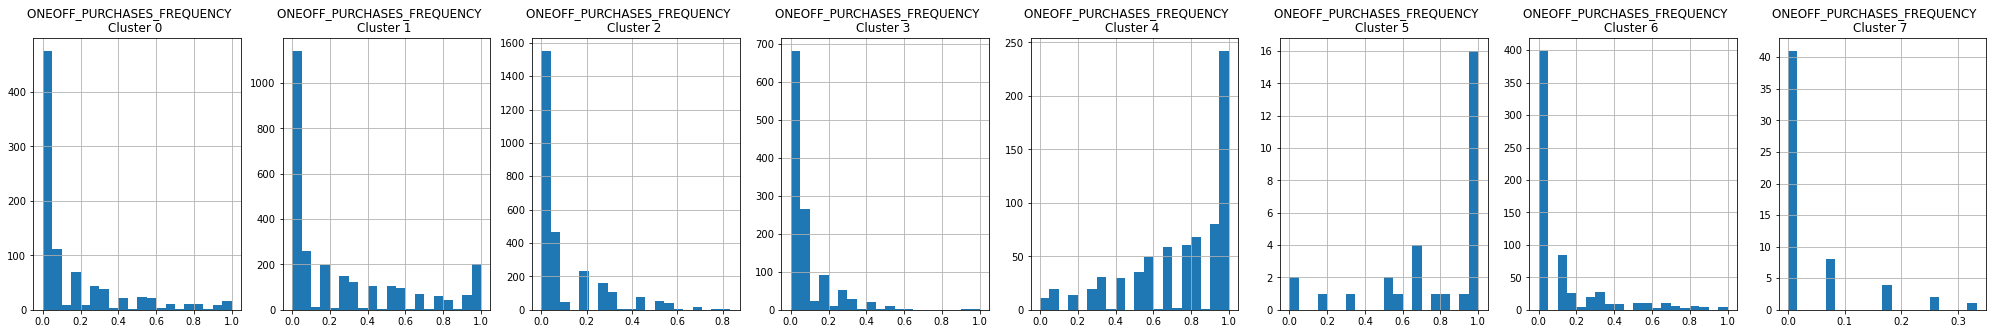

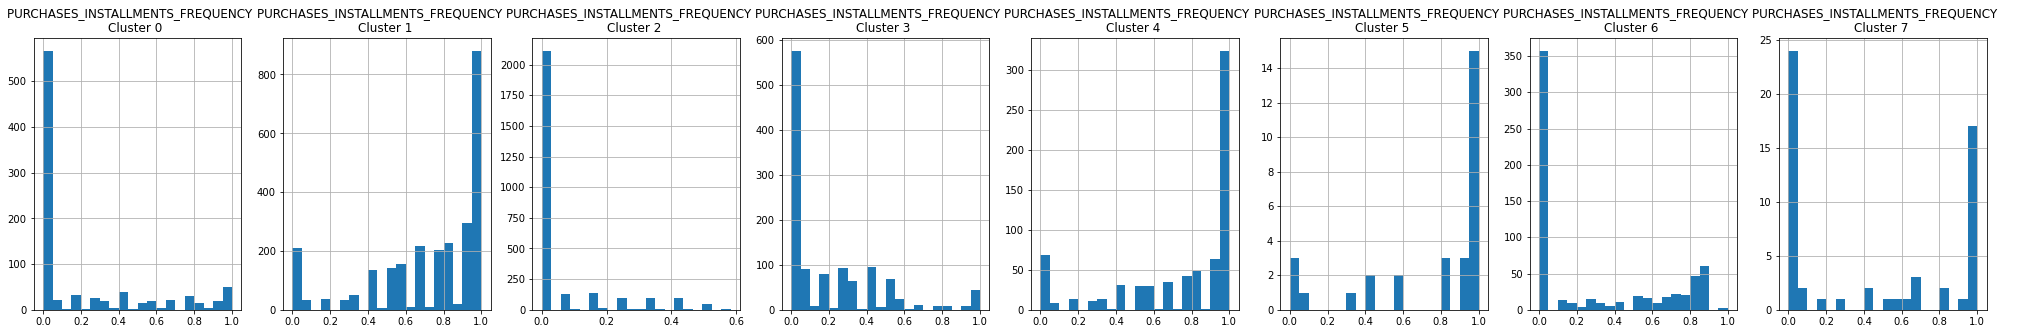

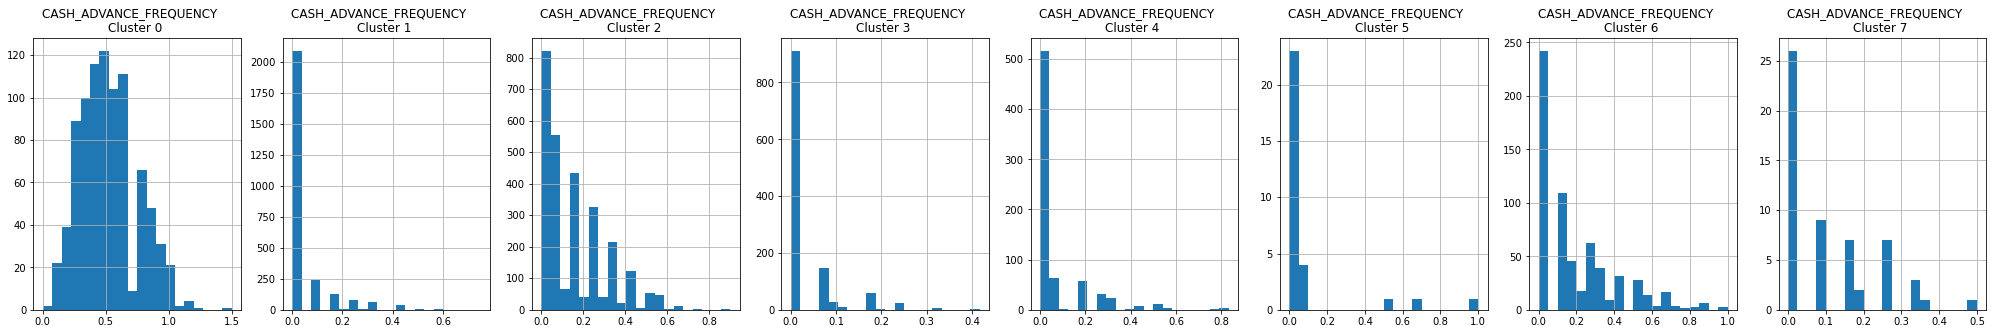

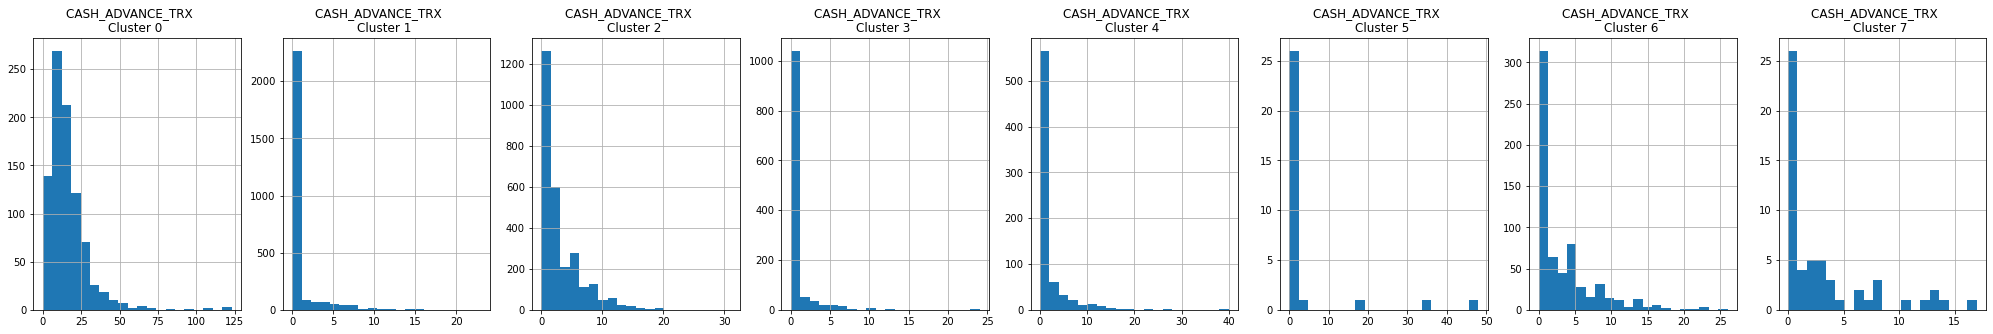

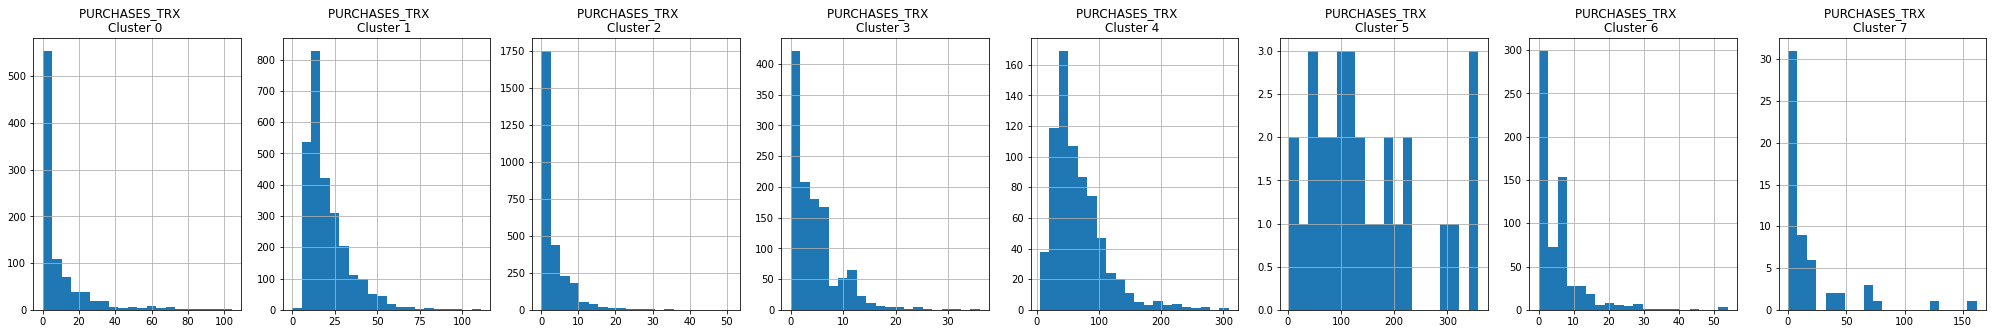

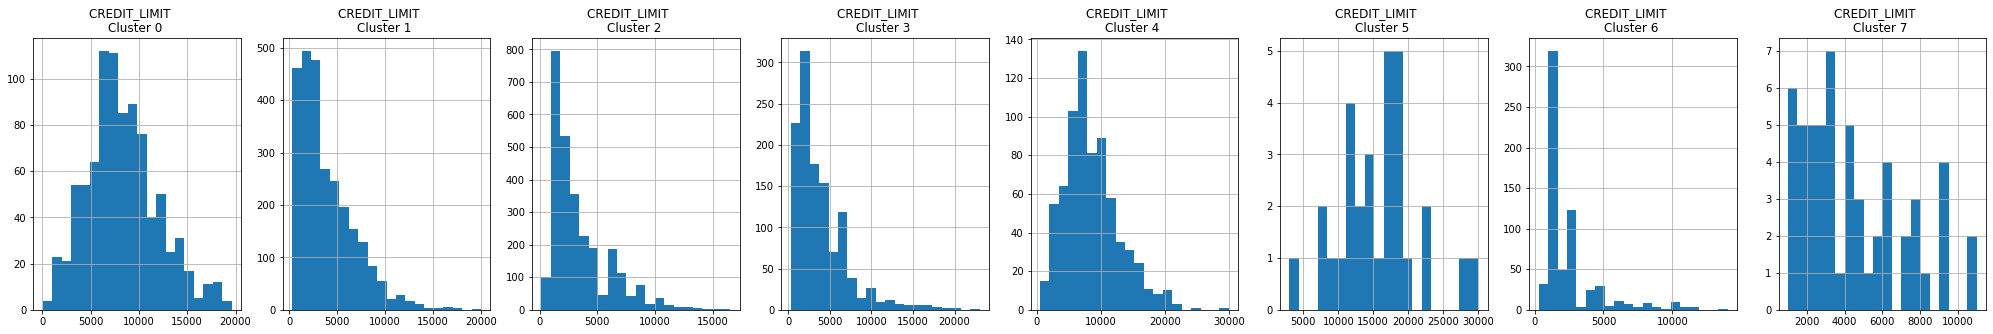

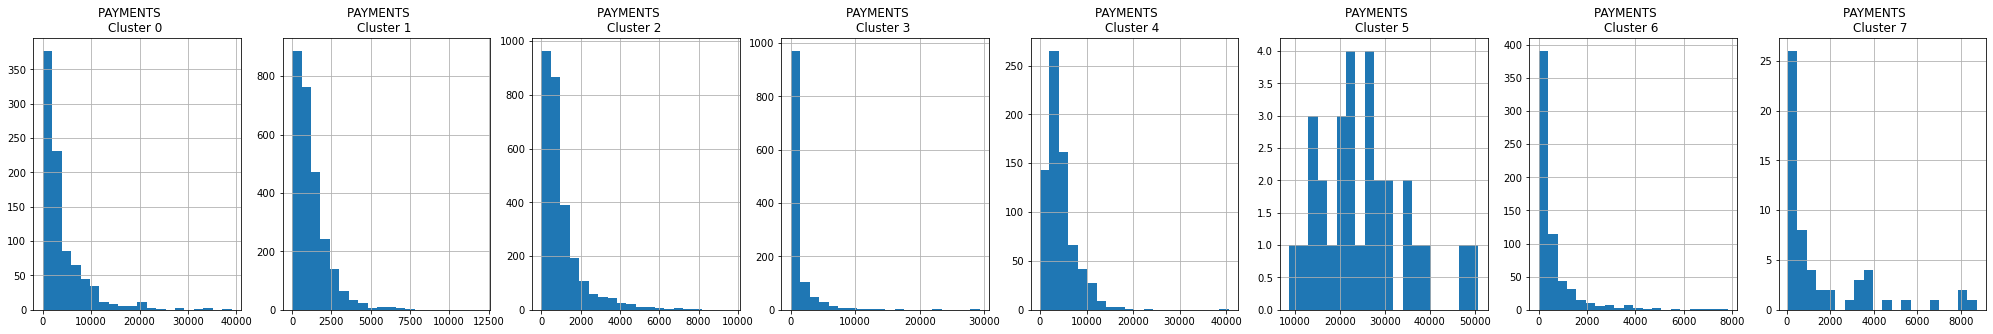

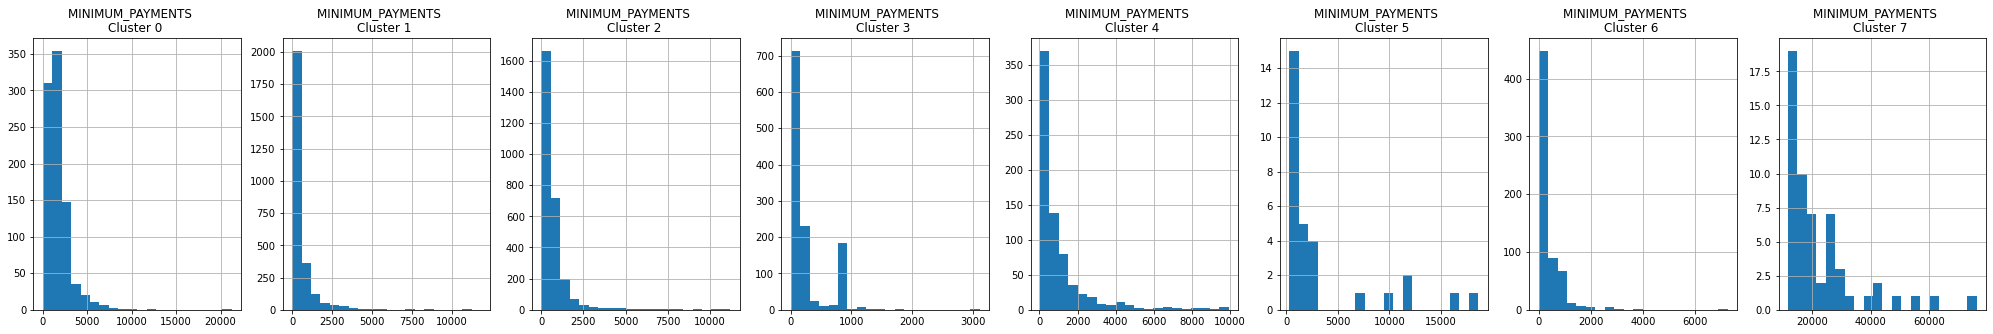

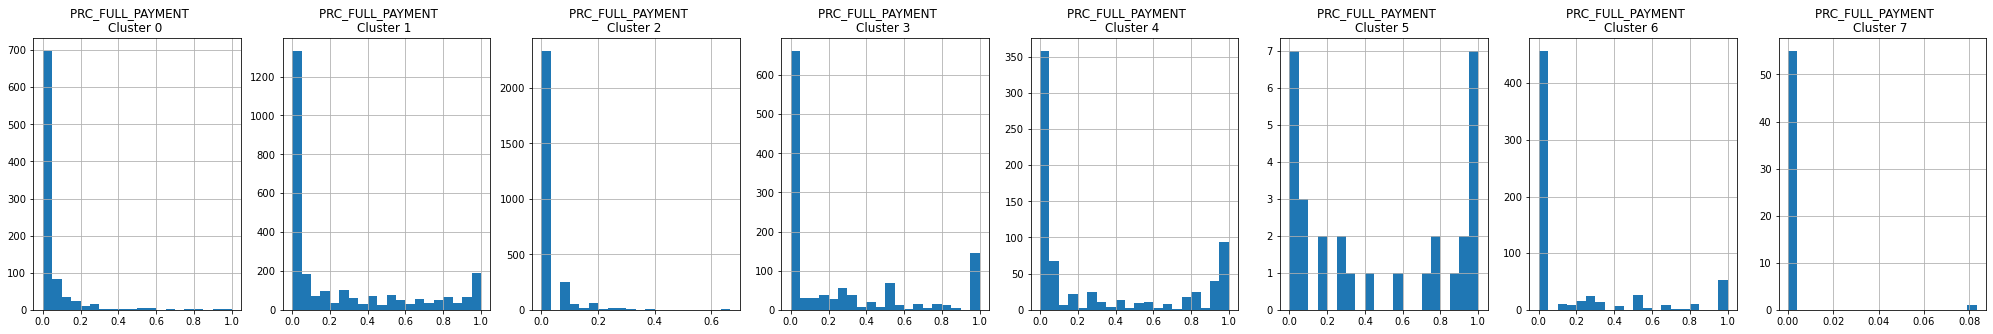

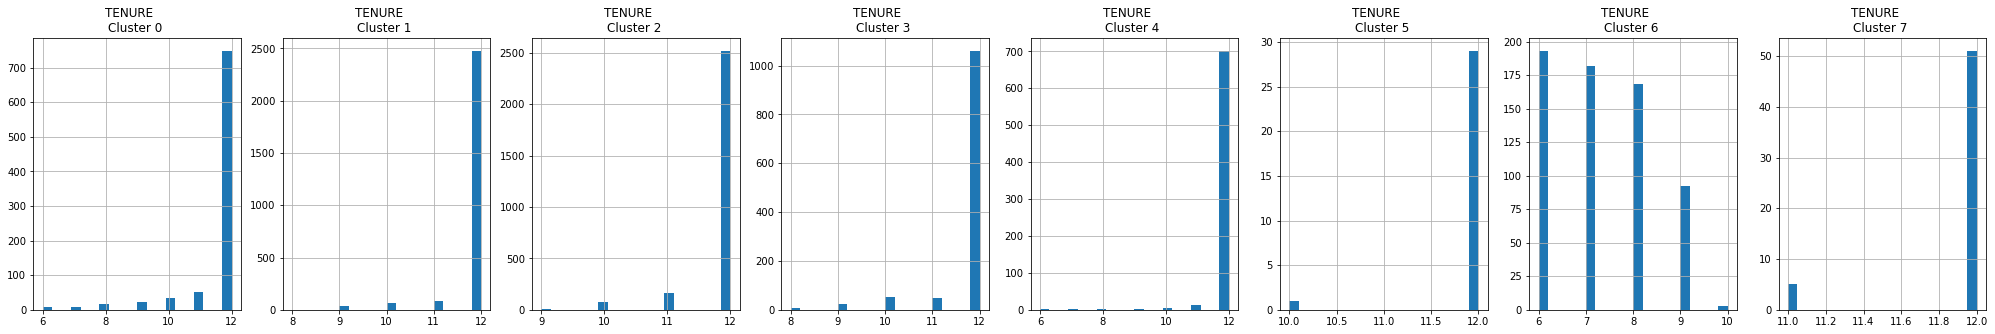

In [32]:
# histogram of the clusters
for i in credit_card_data.columns:
    plt.figure(figsize = (35, 5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = credit_card_data_cluster[credit_card_data_cluster["cluster"] == j]
        cluster[i].hist(bins = 20)
        plt.title("{}    \nCluster {} ".format(i,j))
        
plt.show()

    

## PCA to visualize the Results

In [33]:
# get the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(credit_card_data_scaled)
principal_comp


array([[-1.68221882, -1.07644844],
       [-1.13829244,  2.50649063],
       [ 0.96968815, -0.38350553],
       ...,
       [-0.92620292, -1.81078933],
       [-2.33655303, -0.65797454],
       [-0.55642597, -0.4004728 ]])

In [34]:
# create a dataframe with the 2 components
pca_df = pd.DataFrame(data = principal_comp, columns = ["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076448
1,-1.138292,2.506491
2,0.969688,-0.383506
3,-0.873628,0.043162
4,-1.599432,-0.688576


In [35]:
# concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1)
pca_df.head()


,pca1,pca2,cluster
0,-1.682219,-1.076448,2
1,-1.138292,2.506491,0
2,0.969688,-0.383506,1
3,-0.873628,0.043162,2
4,-1.599432,-0.688576,2


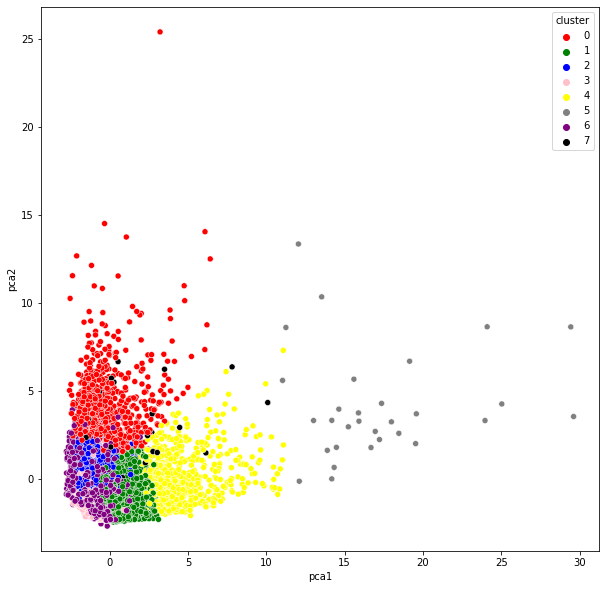

In [36]:
plt.figure(figsize=(10,10))
ax = sb.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

## Autoencoding for Dimensionality Reduction

In [44]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform

encoding_dim = 7

input_df = Input(shape=(17,))

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder - used for our dimension reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')



In [45]:
credit_card_data_scaled.shape

(8950, 17)

In [47]:
autoencoder.fit(credit_card_data_scaled, credit_card_data_scaled, batch_size = 128, epochs = 25, verbose = 1)


Epoch 1/25
70/70 [==============================] - 3s 26ms/step - loss: 0.5615
Epoch 2/25
70/70 [==============================] - 2s 25ms/step - loss: 0.3488
Epoch 3/25
70/70 [==============================] - 2s 26ms/step - loss: 0.2725
Epoch 4/25
70/70 [==============================] - 2s 25ms/step - loss: 0.2378
Epoch 5/25
70/70 [==============================] - 2s 25ms/step - loss: 0.1995
Epoch 6/25
70/70 [==============================] - 2s 25ms/step - loss: 0.1838
Epoch 7/25
70/70 [==============================] - 2s 25ms/step - loss: 0.1631
Epoch 8/25
70/70 [==============================] - 2s 25ms/step - loss: 0.1493
Epoch 9/25
70/70 [==============================] - 2s 25ms/step - loss: 0.1321
Epoch 10/25
70/70 [==============================] - 2s 27ms/step - loss: 0.1254
Epoch 11/25
70/70 [==============================] - 2s 26ms/step - loss: 0.1201
Epoch 12/25
70/70 [==============================] - 2s 28ms/step - loss: 0.1071
Epoch 13/25
70/70 [==================

In [48]:
autoencoder.save_weights('autoencoder.h5')

In [49]:
pred = encoder.predict(credit_card_data_scaled)

280/280 [==============================] - 1s 4ms/step


In [50]:
pred.shape

(8950, 10)

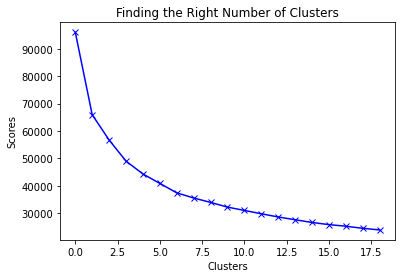

In [51]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title("Finding the Right Number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("Scores")
plt.show()

C:\Users\Ryan\AppData\Local\Temp/ipykernel_14340/3067751309.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
C:\Users\Ryan\AppData\Local\Temp/ipykernel_14340/3067751309.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


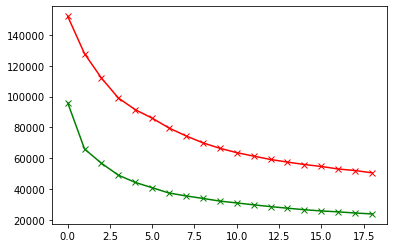

In [52]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [53]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_means = kmeans.fit_predict(credit_card_data_scaled)

In [54]:
df_cluster_dr = pd.concat([credit_card_data, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()    
                                                                                                  

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [68]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-2.267167,-0.083840
1,0.424366,1.844296
2,1.699343,-0.616987
3,-1.386940,-0.343778
4,-2.228763,-0.037049


In [69]:
pca_df2 = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df2.head()

,pca1,pca2,cluster
0,-2.267167,-0.083840,1
1,0.424366,1.844296,3
2,1.699343,-0.616987,0
3,-1.386940,-0.343778,1
4,-2.228763,-0.037049,1


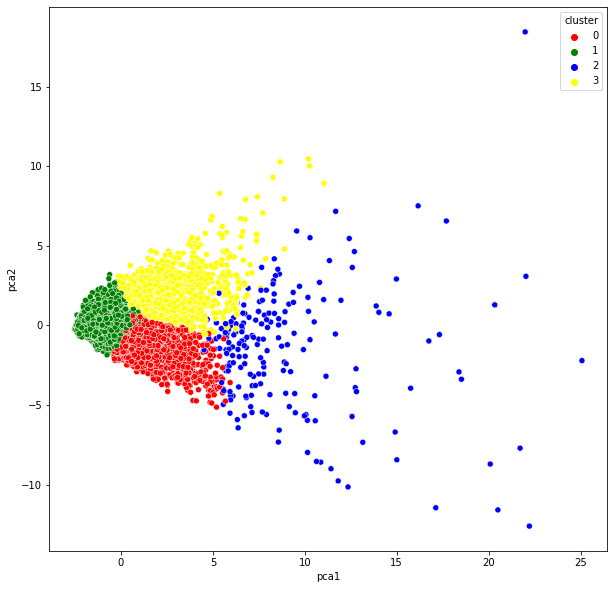

In [71]:
plt.figure(figsize=(10,10))
ax = sb.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df2, palette =['red','green','blue','yellow'])
plt.show()
